I'm currently reading [The Art of Statistics](http://https://www.amazon.co.uk/Art-Statistics-Learning-Pelican-Books/dp/0241398630/ref=sr_1_1?adgrpid=66944438590&gclid=Cj0KCQjwn8_mBRCLARIsAKxi0GLLygbjiohRwH1TNpvNlS76cADYZma76okAfBAGP4LJ1rcfLx_m12saAsxyEALw_wcB&hvadid=316054021175&hvdev=c&hvlocphy=1002316&hvnetw=g&hvpos=1t1&hvqmt=e&hvrand=5651126389211006954&hvtargid=aud-615477028278%3Akwd-643051317749&hydadcr=11463_1788004&keywords=the+art+of+statistics&qid=1557428674&s=gateway&sr=8-1) by David Spiegelhalter. It's pretty nice as an introductory text and good refersher of us who use statistics frequently but are not proefessionals. Fabulously it has a [GitHub repo](https://github.com/dspiegel29/ArtofStatistics) with code for graphs and analyses. In chapter two we are introduced in to how to summarise and communicate numbers, with particular emphasis on mean, median and mode. As one of his examples David uses [Natsal](http://www.natsal.ac.uk/home.aspx) which is a study of British peoples sex lives. This introduces all sorts of issues with averages and also issues with surveys. This got me thinking that the prescribing dataset could be used to illustrate the same points i.e. mean, median, mode, issues with a biased sample. 

 PDE V inhibtiors are used to treat erectile dysfunction so for the most part (we can fill you in on NHS diversion at some point if you want), this group we have in the prescribing datset is a sexually active group. The original NHS advice (Health Service Circular (HSC) 1999/148 and 177) advised that on average British people have intercourse four times per month. Therefore I expect the overwhelming majority of scripts to be for four tablets (or a muliplte of four) which will highlight how PCTs, CCGs and GPs took mean from  one sample and then applied it to every single patient. 



(As an aside I actually tried to have this chat with some GPs early in my MO team career (prob <6months) and quicky found out that one rule for all i.e. four in this case is preferred - thats why I am so keen on the decision support approach/ethos/idea Ben has and we will hopefully progress soon) 

In starting this I have three potential outcome in mind
1. Learn how to clumsily handle R at a first attempt (thats what is used in David's book and GitHUb)
2. Potentially use this as a teaching case for mean, median, mode
3. Add to the literature on sexual activity supporting Natsal (which is updated every 10 years and is coming up again so I expect they are in planning stages) etc. I suspect erectile dysfunction is underplayed in self-reported surveys (and I'm sure there are studies on tis topic)
4. A lighthearted Christmas BMJ type paper illustrating the issues but engaging people in prescribing data, data more broadly and visualisation. There is always the potential for tabloid style headlines with this particular analysis.

One drawback with the public prescribing dataset is that I don't know age, sex ( I gurantee we will find females prescribed it in a small number of circumstances), or quantity on individual scripts so we can't actually check my suspicions until we get the data from BSA.

In [1]:
## import stuff needed
import pandas as pd
from ggplot import * ##https://github.com/yhat/ggpy -  Python implementation of the grammar of graphic which is used in R
from ebmdatalab import bq ##Datalab commands
import matplotlib as plt ## theres a twist at the end why I need this!

In [2]:
#### the following SQL extracts all PDEV inhibotrs with exception of liquids.
sql = '''SELECT
practice,
  bnf_name,
  items,
  quantity
FROM
  ebmdatalab.hscic.prescribing_2019_02 AS presc ##only used Feb as latest month For plots. If people think is a runner we can do trends etc.
WHERE
(bnf_code LIKE "0704050AC%" or ### Avanafil
bnf_code LIKE "0704050Z0%" or ### Sildenafil
bnf_code LIKE "0704050R0%" or ### Tadalafil
bnf_code LIKE "0704050AA%" ) ### Vardenafil
AND (bnf_code NOT LIKE '0704050Z0AAA'  ##this excludes sildenafil liquids. NOne of the rest have liquids 
or bnf_code NOT LIKE '0704050Z0AAAIAI' 
or bnf_code NOT LIKE '0704050Z0AAAJAJ' 
or bnf_code NOT LIKE '0704050Z0AAAHAH'
or bnf_code NOT LIKE '0704050Z0AAAEAE'
or bnf_code NOT LIKE '0704050Z0AAAGAG'
or bnf_code NOT LIKE '0704050Z0AAAFAF'
or bnf_code NOT LIKE '0704050Z0AAAKAK'
or bnf_code NOT LIKE '0704050Z0AAAQAQ'
or bnf_code NOT LIKE '0704050Z0AAALAL'
or bnf_code NOT LIKE '0704050Z0AAAKAK') 
  GROUP BY
  practice,
  bnf_name,
    items,
    quantity
'''
    
df_pdev = bq.cached_read(sql, csv_path='df_pdev.csv', use_cache=True)  # add `use_cache=False` to override
df_pdev.head()

,practice,bnf_name,items,quantity
0,D81029,Sildenafil_Tab 100mg,38,220
1,L83101,Sildenafil_Tab 100mg,48,478
2,N84012,Sildenafil_Tab 50mg,24,156
3,C84028,Tadalafil_Tab 10mg,6,58
4,D83012,Sildenafil_Tab 100mg,43,204


In [3]:
df_pdev.sort_values(by='items', ascending=False)

,practice,bnf_name,items,quantity
480,M85063,Sildenafil_Tab 100mg,197,1519
6457,Y01008,Sildenafil_Tab 100mg,173,816
389,D81022,Sildenafil_Tab 100mg,168,898
6472,K83002,Sildenafil_Tab 100mg,159,760
4870,B82005,Sildenafil_Tab 100mg,158,756
2399,D81022,Sildenafil_Tab 50mg,141,716
649,F85002,Sildenafil_Tab 100mg,134,1016
3616,L82041,Sildenafil_Tab 100mg,133,924
5172,C84001,Sildenafil_Tab 100mg,132,878
3514,C84024,Sildenafil_Tab 100mg,130,612


In [4]:
df_pdev.describe()

,items,quantity
count,43524.000000,43524.000000
mean,7.717558,59.854195
std,11.588348,80.937163
min,1.000000,1.000000
25%,1.000000,8.000000
50%,3.000000,28.000000
75%,9.000000,80.000000
max,197.000000,1519.000000


In [5]:
df_pdev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43524 entries, 0 to 43523
Data columns (total 4 columns):
practice    43524 non-null object
bnf_name    43524 non-null object
items       43524 non-null int64
quantity    43524 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [6]:
## ideally we would want quantity on each script but this is the average for exploration
df_pdev['qty_per_script'] = df_pdev['quantity']/df_pdev['items']

In [7]:
df_pdev.head()

,practice,bnf_name,items,quantity,qty_per_script
0,D81029,Sildenafil_Tab 100mg,38,220,5.789474
1,L83101,Sildenafil_Tab 100mg,48,478,9.958333
2,N84012,Sildenafil_Tab 50mg,24,156,6.500000
3,C84028,Tadalafil_Tab 10mg,6,58,9.666667
4,D83012,Sildenafil_Tab 100mg,43,204,4.744186


In [8]:
df_pdev['qty_per_script'] =  df_pdev.qty_per_script.round()
df_pdev.head()

,practice,bnf_name,items,quantity,qty_per_script
0,D81029,Sildenafil_Tab 100mg,38,220,6.0
1,L83101,Sildenafil_Tab 100mg,48,478,10.0
2,N84012,Sildenafil_Tab 50mg,24,156,6.0
3,C84028,Tadalafil_Tab 10mg,6,58,10.0
4,D83012,Sildenafil_Tab 100mg,43,204,5.0


In [9]:
df2 = df_pdev.groupby('qty_per_script')['items'].sum().reset_index()
df2.head(30)

,qty_per_script,items
0,1.0,62
1,2.0,248
2,3.0,758
3,4.0,44583
4,5.0,70104
5,6.0,72088
6,7.0,55639
7,8.0,41205
8,9.0,15002
9,10.0,8566


The following is the git repo from the book chapter as I wanted to create similar graphs
https://github.com/dspiegel29/ArtofStatistics/commits/master/02-4-reported-partners

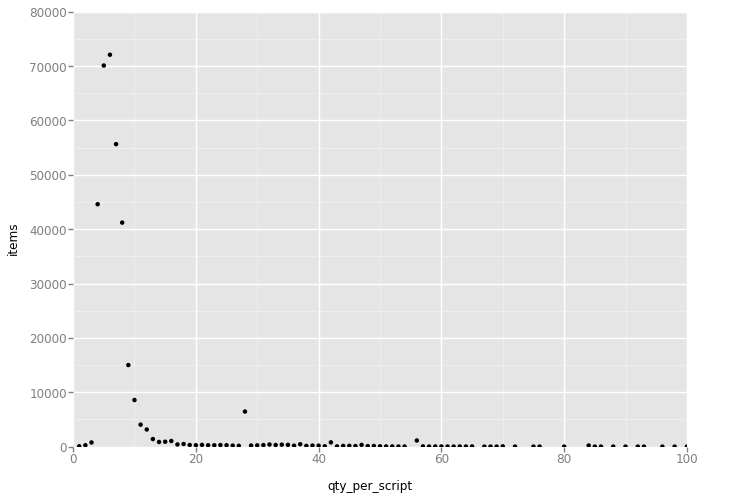

<ggplot: (189454054159)>

In [10]:
 
p = ggplot(df2, aes(x="qty_per_script", y="items"))
p + geom_point()  ##geom bar does not appear to work https://stackoverflow.com/questions/22599521/how-do-i-create-a-bar-chart-in-python-ggplot
p +  scale_x_discrete(("qty_per_script"), limits=(0,100))
p + scale_y_continuous(limits=(0, 80000)) 
p # draw the plot


# the following is R sript from David's repo
# constructs initial plot object, p
#p + geom_bar(aes(y='Percent',fill="items"),stat = "identity",position="dodge") # assigns bar-chart type with side by side (dodged) bars
#p + geom_text(aes(x = 30, y = 12, label = "xxx", color = "Female", hjust=0)) # our custom legend
#p + geom_text(aes(x = 30, y = 11, label = "xxxx", color = "Male", hjust=0)) # our custom legend
#p + scale_x_continuous(breaks = c(0,5,10,15,20,25,30,35,40,45,50), limits=c(0,50)) # desired x-axis value labels
#p + scale_y_continuous(breaks = c(0,2,4,6,8,10,12,14,16,18)) # desired y-axis value labels
#p + theme(legend_position="none") # removes the default legend
#p +  labs(x="Reported number of lifetime opposite-sex partners", y="Percentage") # Adds axis labels  


##Troubleshooting
###https://stackoverflow.com/questions/36164817/yhat-ggplot-facet-wrap-type-error
### http://blog.yhat.com/posts/ggplot-for-python.html

Variation in mean quantity per script with a long tail and a few spikes. Around 15 and 27 are interesting spikes. I think this is reflecting a actual spike of quantity per script at multiples of 4 but is shifted (as it is a mean) due to larger quanties at 4 and 8.

If you are wondering why a scatterplot - it turns out the ggplot repo is not fully complete. Look at me trying to help the GitHub community troubleshoot it [here](https://github.com/yhat/ggpy/issues/662)! Me trying to help troubleshoot - lol! Blind leading the blind

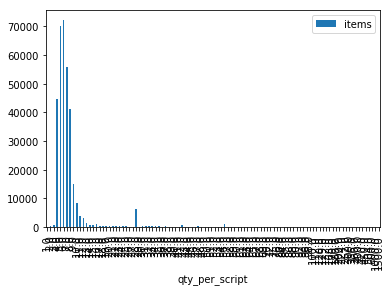

In [11]:
df2.plot.bar(x='qty_per_script', y='items')


So there is a decent anmount of variation with a long tail of average quantity per script. Would be interesting to see how that pans out as actual quanity on a script. Or maybe its not!

So using the raw data from our import we do have more granular data that allows some more investigation.

In [36]:
###querying raw data from a temp file
sql = '''SELECT
PCO_Name,
PCO_Code,
Practice_Name,
Practice_Code,
BNF_Code,
BNF_DEscription,
  items,
  quantity
FROM
  ebmdatalab.tmp_eu.raw_prescribing_data_2019_02 AS presc ##only used Feb as latest month For plots. If people think is a runner we can do trends etc.
WHERE
(bnf_code LIKE "0704050AC%" or ### Avanafil
bnf_code LIKE "0704050Z0%" or ### Sildenafil
bnf_code LIKE "0704050R0%" or ### Tadalafil
bnf_code LIKE "0704050AA%" ) ### Vardenafil
AND (bnf_code NOT LIKE '0704050Z0AAA'  ##this excludes sildenafil liquids. NOne of the rest have liquids 
or bnf_code NOT LIKE '0704050Z0AAAIAI' 
or bnf_code NOT LIKE '0704050Z0AAAJAJ' 
or bnf_code NOT LIKE '0704050Z0AAAHAH'
or bnf_code NOT LIKE '0704050Z0AAAEAE'
or bnf_code NOT LIKE '0704050Z0AAAGAG'
or bnf_code NOT LIKE '0704050Z0AAAFAF'
or bnf_code NOT LIKE '0704050Z0AAAKAK'
or bnf_code NOT LIKE '0704050Z0AAAQAQ'
or bnf_code NOT LIKE '0704050Z0AAALAL'
or bnf_code NOT LIKE '0704050Z0AAAKAK') 
  GROUP BY
PCO_Name,
PCO_Code,
Practice_Name,
Practice_Code,
BNF_Code,
BNF_Description,
    items,
    quantity
'''

df_pdevraw = bq.cached_read(sql, csv_path='df_pdevraw.csv', use_cache=True)  # add `use_cache=False` to override
df_pdevraw.head()

,PCO_Name,PCO_Code,Practice_Name,Practice_Code,BNF_Code,BNF_DEscription,items,quantity
0,BOLTON CCG,00T00,BOLTON COMMUNITY PRACTICE,Y03079,0704050ACBBACAC,Spedra_Tab 200mg,1,4
1,"HAMBLETON, RICHMONDSHIRE AND WHITBY CCG",03D00,THIRSK DOCTORS SURGERY,B82049,0704050ACAAACAC,Avanafil_Tab 200mg,2,4
2,SWINDON CCG,12D00,ABBEY MEADS MEDICAL PRACT,J83035,0704050AABBACAC,Levitra_Tab 20mg,1,4
3,BOLTON CCG,00T00,LITTLE LEVER HEALTH CENTRE 1,P82020,0704050ACAAABAB,Avanafil_Tab 100mg,1,4
4,BRIGHTON & HOVE CCG,09D00,SEVEN DIALS MEDICAL CENTRE,G81047,0704050AABBACAC,Levitra_Tab 20mg,1,24


In [23]:
## now group per quntity on the script
df_pdefreq = df_pdevraw.groupby('quantity')['items'].sum().reset_index()
df_pdefreq.head()

,quantity,items
0,1,1137
1,2,1137
2,3,62
3,4,177649
4,5,36


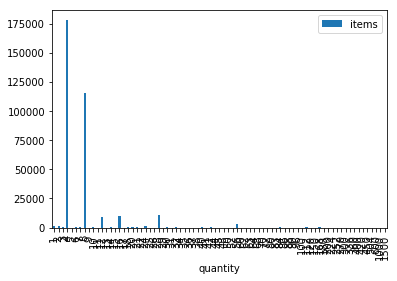

In [20]:
df_pdefreq.plot.bar(x='quantity', y='items')

As expected English resident with ED have sex in multiples of 4 beofre returning for another prescription!

However a few indiviuals below got a lot of tablets on one script, one had 1500 tablets!

In [37]:
## sort for the largest quantities
df_pdefreq.sort_values('quantity', ascending=False).head(20)

,quantity,items
76,1500,1
75,1000,1
74,600,1
73,504,1
72,450,4
71,420,2
70,400,2
69,360,1
68,336,3
67,300,1
